In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from scipy import ndimage

## **Data Analysis**

In [62]:
def rgb2gray(rgb):
    img = np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
    return img / 255

def convert_to_array(data_dir):
    files = os.listdir(data_dir)
    dataset = []
    for picture in files:
        img = cv2.imread(data_dir + f"/{picture}")
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (400, 400))
        img = rgb2gray(img)
        
        dataset.append(img)
    
    return np.array(dataset)

images = convert_to_array("../data/train_images")

In [63]:
label = pd.read_csv("../data/train_info.csv")
label

,file_name,hamiltonian
0,graph4443.png,yes
1,graph1905.png,no
2,graph7719.png,no
3,graph4902.png,no
4,graph4114.png,yes
...,...,...
4423,graph4672.png,yes
4424,graph3437.png,yes
4425,graph3649.png,no
4426,graph893.png,yes


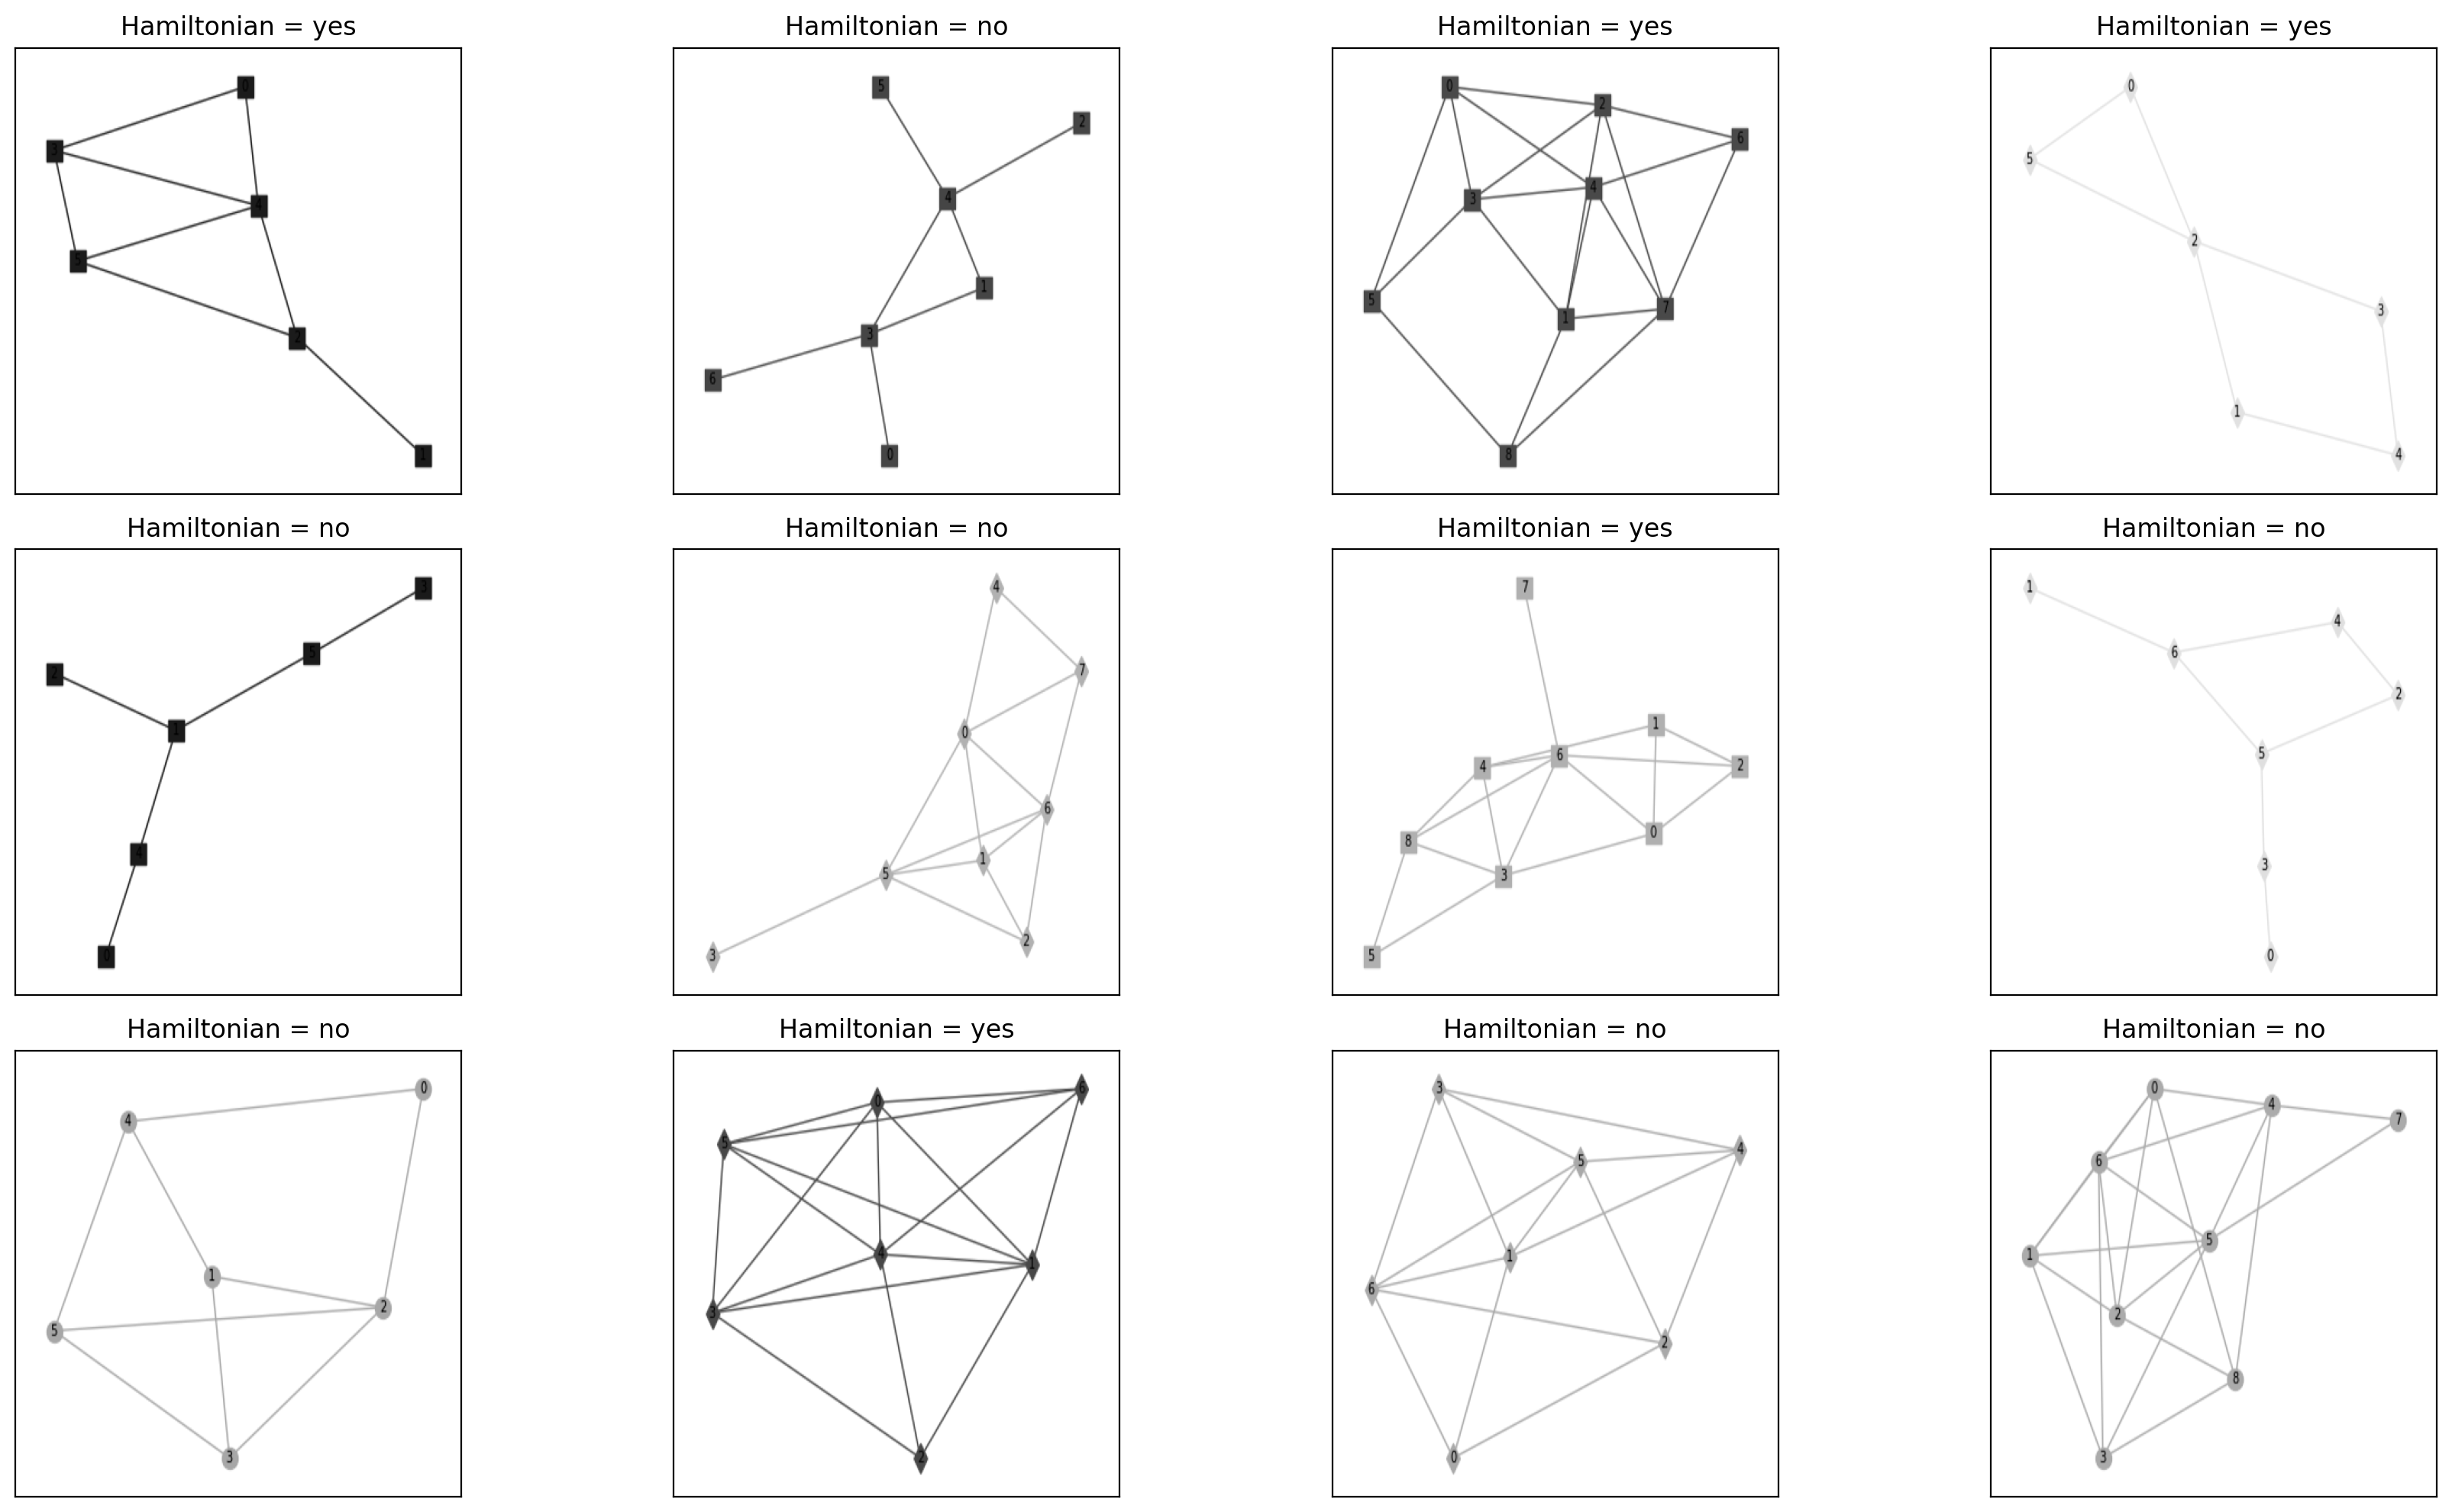

In [64]:
def plot_random_sample(images, label):
    random_indices = np.random.choice(images.shape[0], 12, replace=False)
    plt.figure(figsize=(20, 10), dpi=200)
    for i, idx in enumerate(random_indices):
        plt.subplot(3, 4, i + 1)
        plt.imshow(images[idx], cmap='gray')
        plt.title(f"Hamiltonian = {label.iloc[idx]['hamiltonian']}")
        plt.axis('on')
        plt.xticks([])
        plt.yticks([])
        plt.tight_layout()

plot_random_sample(images, label)

In [65]:
label["hamiltonian"][0]
images[0].shape

(400, 400)

In [88]:
def augment_data(images, labels, num_augmentations):
    augmented_images = []
    augmented_labels = []

    for i in range(images.shape[0]):
        for _ in range(num_augmentations):
            angle = np.random.uniform(-90, 90)
            rotated_image = ndimage.rotate(images[i], angle, reshape=True)

            shift = np.random.uniform(-5, 5, 2)
            shifted_image = ndimage.shift(rotated_image, shift)

            if np.random.rand() > 0.5:
                flipped_image = np.fliplr(shifted_image)
            else:
                flipped_image = shifted_image

            augmented_images.append(flipped_image)
            augmented_labels.append(labels.iloc[i])

    max_shape = np.max([img.shape for img in augmented_images], axis=0)

    resized_images = []
    for img in augmented_images:
        resized_img = cv2.resize(img, (max_shape[1], max_shape[0]), interpolation=cv2.INTER_AREA)
        resized_images.append(resized_img)

    return np.array(resized_images), pd.DataFrame(augmented_labels)

In [ ]:
augmented_data = augment_data(images, label["hamiltonian"], 2)

## **Moedel Design**